In [2]:
import pandas as pd
import numpy as np

h1b= pd.read_excel("H1B_Data_FY2023_Q4.xlsx")
h1b.to_csv('H1B_Data_FY2023_Q4.csv', index=False)


### Approval Rates

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('H1B_Data_FY2023_Q4.csv')

# Convert all string data to lowercase to ensure consistency
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Define a function to categorize the case status
def categorize_status(status):
    if status == 'certified':
        return 'Approved'
    elif status == 'certified - withdrawn':
        return 'Not Approved'
    else:
        return 'Not Approved'

# Apply the function to the CASE_STATUS column
df['Approval_Status'] = df['CASE_STATUS'].apply(categorize_status)

# Calculate the approval rate
approval_counts = df['Approval_Status'].value_counts(normalize=True)
approval_rate = approval_counts.get('Approved', 0) * 100  # Get method avoids KeyError if 'Approved' is not present
print(f'Approval Rate: {approval_rate:.2f}%')


Approval Rate: 90.55%


In [3]:
approval_rate_by_employer = df.groupby('EMPLOYER_NAME')['Approval_Status'].value_counts(normalize=True).unstack().fillna(0)['Approved'] * 100
print(approval_rate_by_employer)

EMPLOYER_NAME
\tEmbraer Engineering & Technology Center USA, Inc.\t    100.000000
\tNetspend Corporation                                   100.000000
   Wells Fargo Bank, N.A.                                100.000000
  Diamond Hill Capital Management, Inc.                  100.000000
  Glassdoor, Inc.                                        100.000000
                                                            ...    
yRuler Inc.                                              100.000000
yes technologies llc                                      33.333333
zZounds Music, LLC                                       100.000000
zulily, LLC.                                             100.000000
¿PGIM, Inc.                                              100.000000
Name: Approved, Length: 27475, dtype: float64


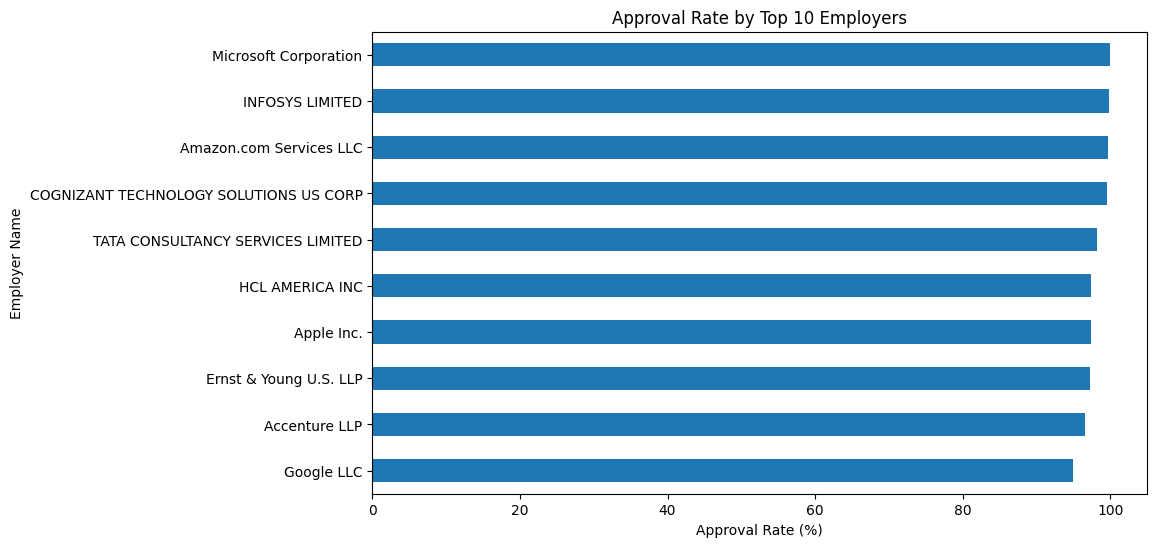

In [8]:
import matplotlib.pyplot as plt

top_employers = df['EMPLOYER_NAME'].value_counts().head(10).index
top_employers_approval_rate = approval_rate_by_employer[top_employers].sort_values()

plt.figure(figsize=(10, 6))
top_employers_approval_rate.plot(kind='barh')
plt.xlabel('Approval Rate (%)')
plt.ylabel('Employer Name')
plt.title('Approval Rate by Top 10 Employers')
plt.show()


In [4]:
top_professions = df['JOB_TITLE'].value_counts().head(10)
print(top_professions)

top_employers = df['EMPLOYER_NAME'].value_counts().head(10)
print(top_employers)

JOB_TITLE
software engineer                                               6909
software developer                                              5475
senior software engineer                                        1734
assistant professor                                             1327
manager jc50 - computer systems engineers/architects             818
data engineer                                                    787
data scientist                                                   668
associate                                                        650
senior associate jc60 -computer systems engineers/architects     636
manager jc50                                                     618
Name: count, dtype: int64
EMPLOYER_NAME
cognizant technology solutions us corp    3275
amazon.com services llc                   2493
infosys limited                           2004
microsoft corporation                     1912
tata consultancy services limited         1495
google llc               

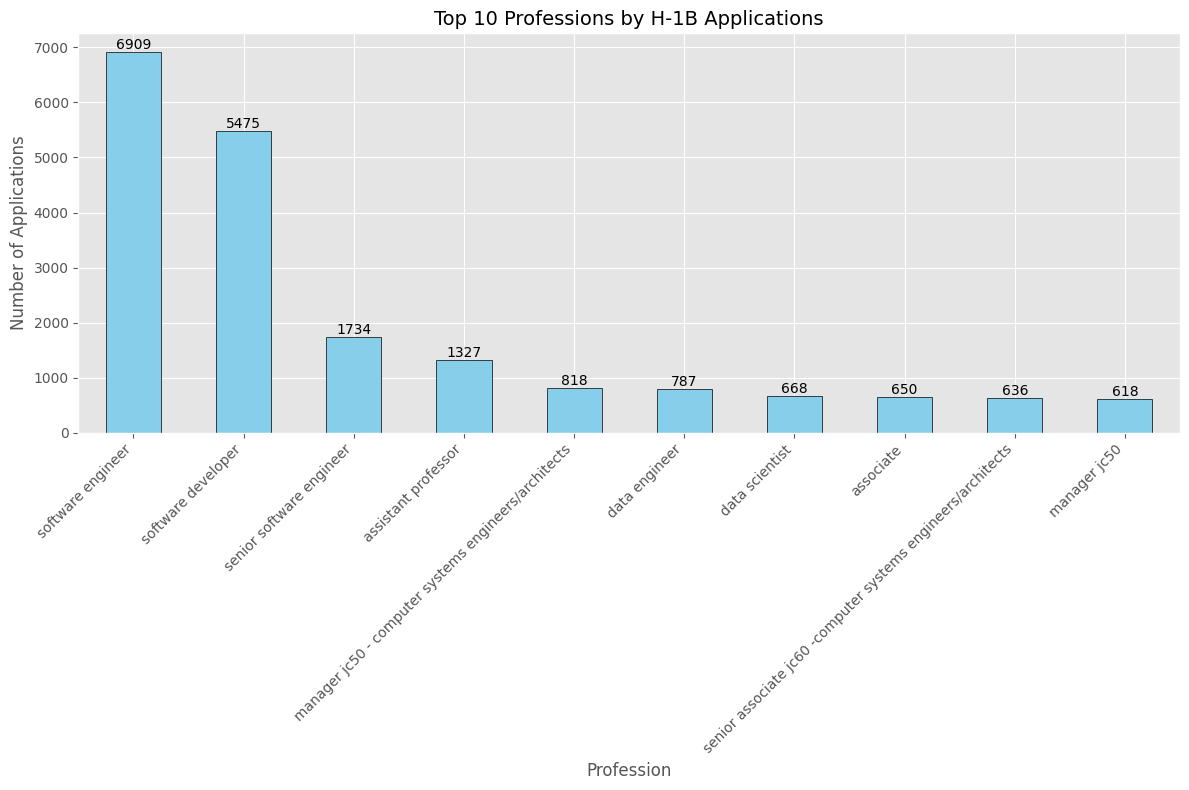

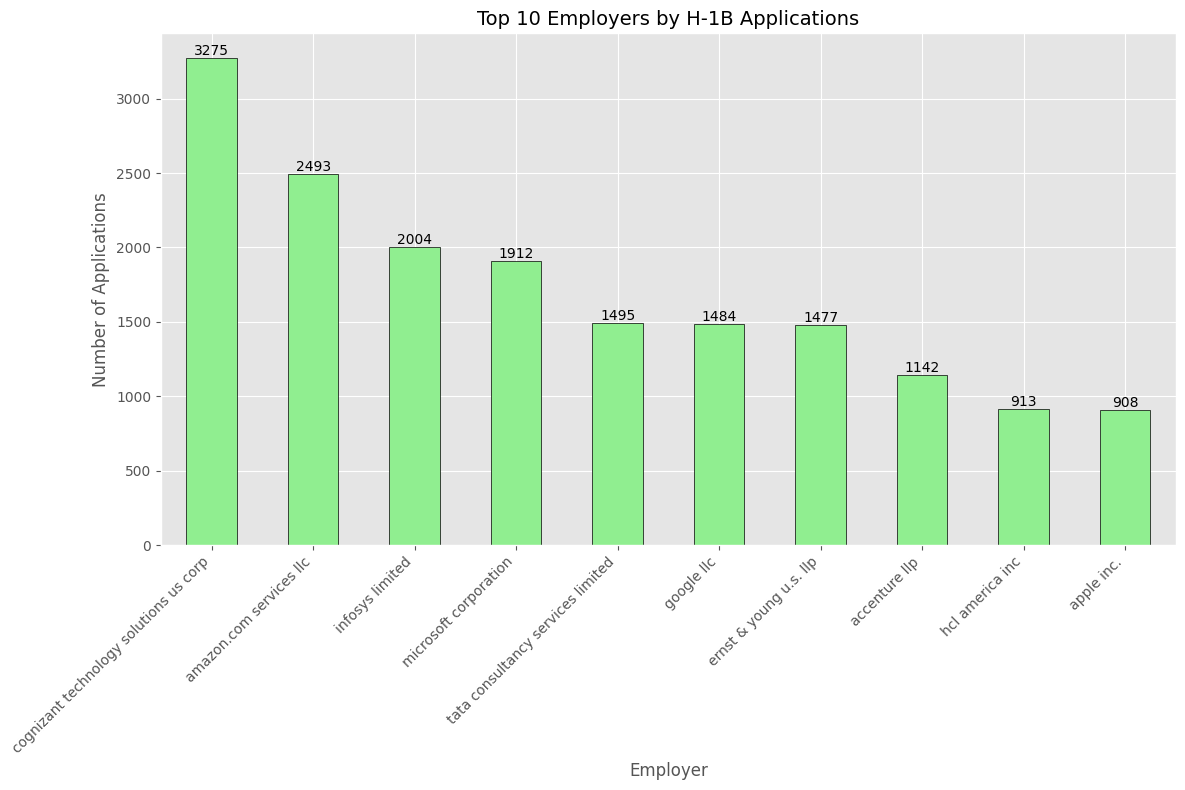

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'top_professions' and 'top_employers' are already defined DataFrames

# Function to add labels on the bars
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set the style
plt.style.use('ggplot')

# Plot for top professions
plt.figure(figsize=(12, 8))
ax1 = top_professions.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Profession', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.title('Top 10 Professions by H-1B Applications', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
add_labels(ax1)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

# Plot for top employers
plt.figure(figsize=(12, 8))
ax2 = top_employers.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Employer', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.title('Top 10 Employers by H-1B Applications', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
add_labels(ax2)
plt.tight_layout()
plt.show()


### 2011-2016 KAGGLE DATASET

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('h1b_kaggle.csv')

# Check for unique values in the 'CASE_STATUS' column
print(df['CASE_STATUS'].unique())

# Filter the dataset for 'CERTIFIED' cases
certified_cases = df[df['CASE_STATUS'] == 'CERTIFIED']

# Calculate approval rate
approval_rate = len(certified_cases) / len(df) * 100
print(f"Approval Rate: {approval_rate:.2f}%")

# Count the number of applications by employer
employer_counts = df['EMPLOYER_NAME'].value_counts()

# Identify the top employer
top_employer = employer_counts.idxmax()
top_employer_count = employer_counts.max()
print(f"Top Employer: {top_employer} with {top_employer_count} applications")




['CERTIFIED-WITHDRAWN' 'WITHDRAWN' 'CERTIFIED' 'DENIED' 'REJECTED'
 'INVALIDATED' 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED' nan]
Approval Rate: 87.12%
Top Employer: INFOSYS LIMITED with 130592 applications


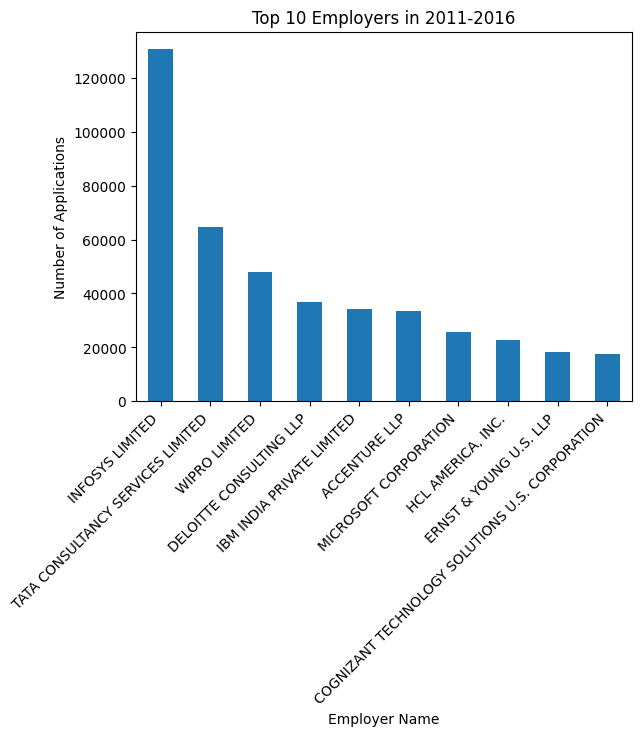

In [4]:
import matplotlib.pyplot as plt

# Plot the top 10 employers
top_employers = employer_counts.head(10)
top_employers.plot(kind='bar')
plt.title('Top 10 Employers in 2011-2016')
plt.xlabel('Employer Name')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.show()


In [5]:
# Count the occurrences of each SOC_NAME
soc_counts = df['SOC_NAME'].value_counts()

# Find the top SOC_NAME
top_soc_name = soc_counts.idxmax()
top_soc_count = soc_counts.max()
print(f"Top SOC Name: {top_soc_name} with {top_soc_count} applications")


Top SOC Name: Computer Systems Analysts with 291170 applications


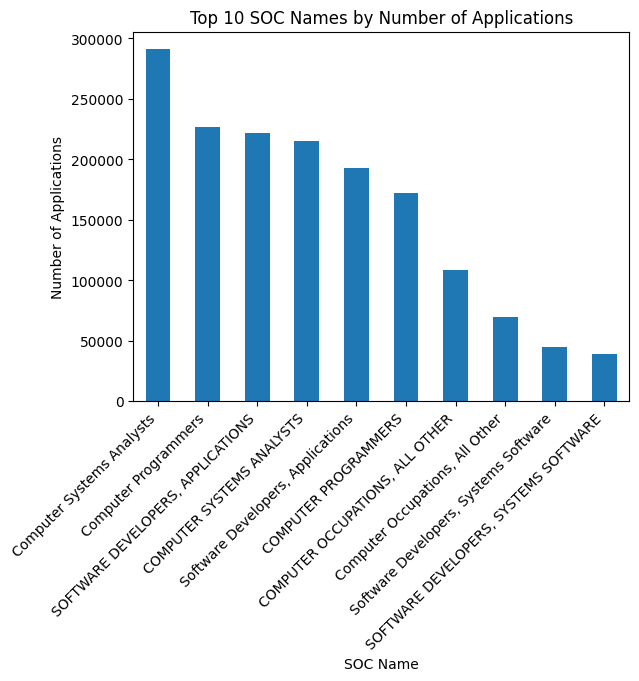

In [6]:
import matplotlib.pyplot as plt

# Plot the top 10 SOC names
top_soc = soc_counts.head(10)
top_soc.plot(kind='bar')
plt.title('Top 10 SOC Names by Number of Applications')
plt.xlabel('SOC Name')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45, ha='right')
plt.show()


In [7]:
# Print the shape of the DataFrame
print("DataFrame Shape:", df.shape)

# Get detailed info on the DataFrame
df.info()

# Get descriptive statistics for numerical columns
df.describe()


DataFrame Shape: (3002458, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01
